<a href="https://colab.research.google.com/github/TomasManuelObregon/Python/blob/Labo2/clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importo y defino cosas.

In [ ]:
# Importo las librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Como el error de distancia es igual para todos lo difino aca
err_dist    = 0.5 # mm

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


# Defino una funcion para leer los datos
def medicion(data):
  datos = np.loadtxt(data, skiprows=1, delimiter=';')

  distancia     = datos[:,0]
  amplitud      = datos[:,1]
  err_amplitud  = datos[:,2]

  distancia_ln      = np.log(distancia)
  amplitud_ln       = np.log(amplitud)
  err_amplitud_ln   = abs(err_amplitud/amplitud) 
  err_distancia_ln  = abs(err_dist/distancia)

  return distancia, amplitud, err_amplitud, distancia_ln, amplitud_ln, err_amplitud_ln, err_distancia_ln

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Defino una funcion y los datos para poder hacer los ajustes
def lin(x,m, b):
  y = m*x + b  
  return y

In [ ]:
# Leo los datos
dist_max, amp_max, err_amp_max, dist_max_ln, amp_max_ln, err_amp_max_ln, err_dist_max_ln = medicion('amp_max_dist.csv')
dist_min, amp_min, err_amp_min, dist_min_ln, amp_min_ln, err_amp_min_ln, err_dist_min_ln = medicion('amp_min_dist.csv')

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# Ajuste para el loglog de los max
popt, pcov = op.curve_fit(lin, dist_max_ln, amp_max_ln, sigma=err_amp_max_ln, absolute_sigma = True)
pend_max_ln = popt[0]
ord_max_ln  = popt[1]
err_pend_max_ln = pcov[0][0]

dom_max = np.linspace(min(dist_max_ln), max(dist_max_ln), 1000)
im_max  = lin(dom_max, pend_max_ln, ord_max_ln)      

# Ajuste para el loglog de los min
popt, pcov = op.curve_fit(lin, dist_min_ln, amp_min_ln, sigma=err_amp_min_ln, absolute_sigma = True)
pend_min_ln = popt[0]
ord_min_ln  = popt[1]
err_pend_min_ln = pcov[0][0]

dom_min = np.linspace(min(dist_min_ln), max(dist_min_ln), 1000)
im_min  = lin(dom_min, pend_min_ln, ord_min_ln)


### Grafico Datos y Ajustes

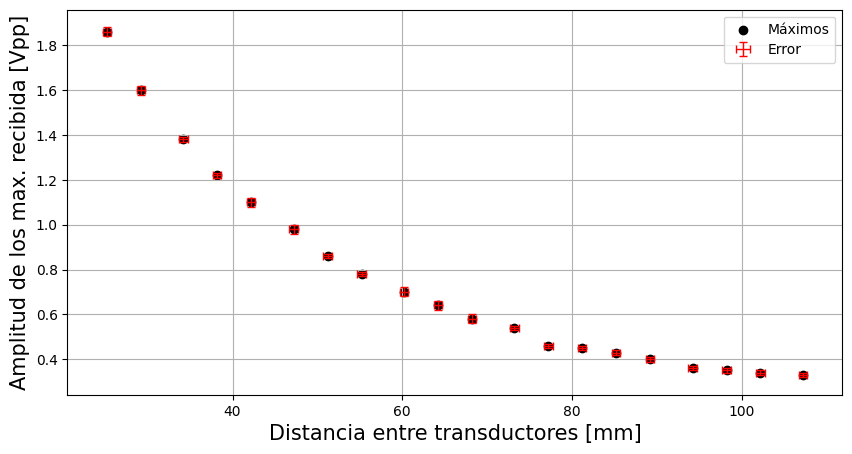

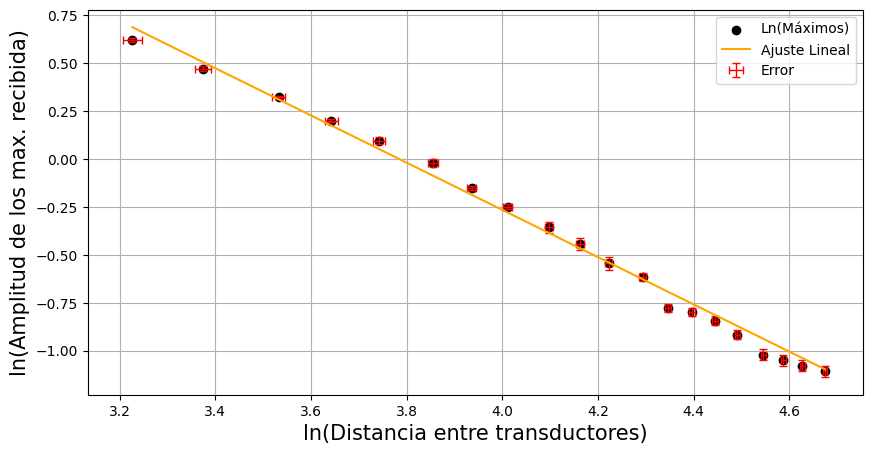

In [ ]:
plt.figure(figsize=[10,5])

plt.scatter(dist_max, amp_max, c='black', marker='o', label='Máximos')
plt.errorbar(dist_max, amp_max, xerr = err_dist, yerr= err_amp_max, linewidth= 0, elinewidth= 1, capsize = 3, c='red', label= 'Error')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud de los max. recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

plt.figure(figsize=[10,5])

plt.scatter(dist_max_ln, amp_max_ln, c='black', marker='o', label='Ln(Máximos)')
plt.errorbar(dist_max_ln, amp_max_ln, xerr = err_dist_max_ln, yerr= err_amp_max_ln, linewidth= 0, elinewidth= 1, capsize = 3, c='red', label= 'Error')
plt.plot(dom_max, im_max, c='orange', label='Ajuste Lineal')

plt.xlabel('ln(Distancia entre transductores)', fontsize=15)
plt.ylabel('ln(Amplitud de los max. recibida)', fontsize=15)
plt.legend()
plt.grid()
plt.show()


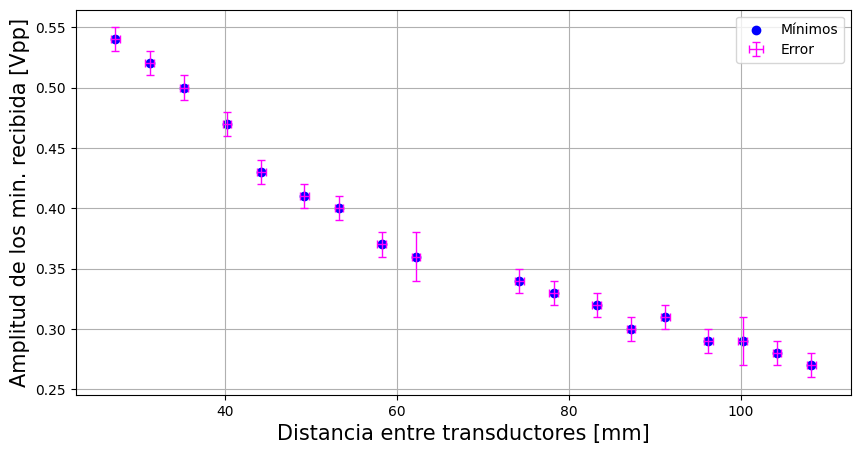

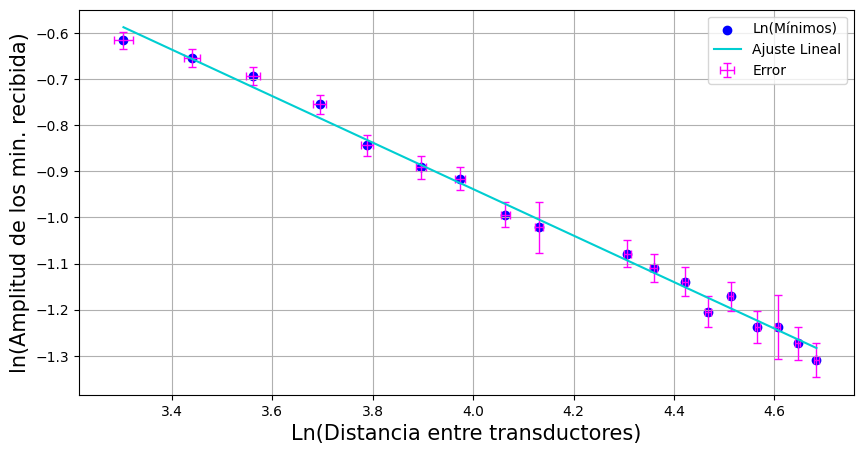

In [ ]:
plt.figure(figsize=[10,5])

plt.scatter(dist_min, amp_min, c='blue', marker='o', label='Mínimos')
plt.errorbar(dist_min, amp_min, xerr = err_dist, yerr= err_amp_min, linewidth= 0, elinewidth= 1, capsize = 3, c='fuchsia', label= 'Error')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud de los min. recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

plt.figure(figsize=[10,5])

plt.scatter(dist_min_ln, amp_min_ln, c='blue', marker='o', label='Ln(Mínimos)')
plt.errorbar(dist_min_ln, amp_min_ln, xerr = err_dist_min_ln, yerr= err_amp_min_ln, linewidth= 0, elinewidth= 1, capsize = 3, c='fuchsia', label= 'Error')
plt.plot(dom_min, im_min, c='darkturquoise', label='Ajuste Lineal')

plt.xlabel('Ln(Distancia entre transductores)', fontsize=15)
plt.ylabel('ln(Amplitud de los min. recibida)', fontsize=15)
plt.legend()
plt.grid()
plt.show()


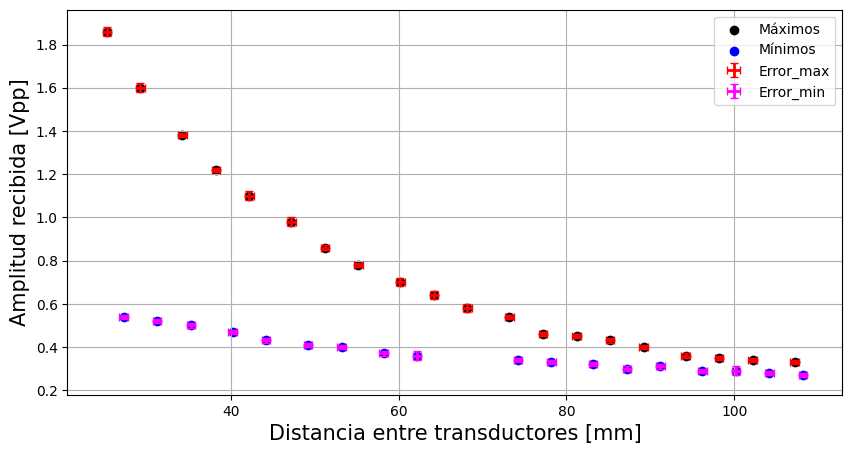

In [ ]:
plt.figure(figsize=[10,5])

plt.scatter(dist_max, amp_max, c='black', marker='o', label='Máximos')
plt.errorbar(dist_max, amp_max, xerr = err_dist, yerr= err_amp_max, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error_max')

plt.scatter(dist_min, amp_min, c='blue', marker='o', label='Mínimos')
plt.errorbar(dist_min, amp_min, xerr = err_dist, yerr= err_amp_min, linewidth= 0, elinewidth= 2, capsize = 3, c='fuchsia', label= 'Error_min')

plt.xlabel('Distancia entre transductores [mm]', fontsize=15)
plt.ylabel('Amplitud recibida [Vpp]', fontsize=15)
plt.legend()
plt.grid()
plt.show()


### Analisis de las pendientes

In [ ]:
print(f'La pendiente del LogLog de los máximos es: {np.round(abs(pend_max_ln), decimals=3)} ± {np.round(abs(err_pend_max_ln), decimals=3)}')
print(f'La pendiente del LogLog de los mínimos es: {np.round(abs(pend_min_ln), decimals=3)} ± {np.round(abs(err_pend_min_ln), decimals=3)}')


pend_prom     = (abs(pend_max_ln)+abs(pend_min_ln))/2
err_pend_prom = np.sqrt(2)*0.5*0.001


print(f'\nEl promedio de las pendientes sería: {np.round(pend_prom, decimals=3)} ± {np.round(err_pend_prom, decimals=3)}')

La pendiente del LogLog de los máximos es: 1.233 ± 0.0
La pendiente del LogLog de los mínimos es: 0.504 ± 0.0

El promedio de las pendientes sería: 0.868 ± 0.001


### -----Amplitud en funcion del Angulo-----

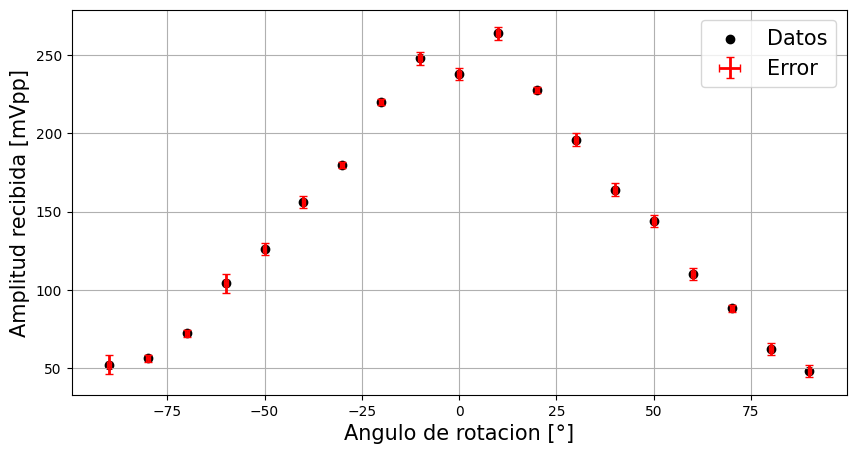

In [95]:
data = np.loadtxt('amp_ang_original.csv', skiprows=1, delimiter=';')
amp_ang     = data[:,0]
ang         = data[:,1]
err_amp_ang = data[:,2]

err_ang = 0.5  # [°] grados

plt.figure(figsize=[10,5])

plt.scatter(ang, amp_ang, c='black', marker='o', label='Datos')
plt.errorbar(ang, amp_ang, xerr = err_ang, yerr= err_amp_ang, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error')

plt.xlabel('Angulo de rotacion [°]', fontsize=15)
plt.ylabel('Amplitud recibida [mVpp]', fontsize=15)
plt.legend(fontsize="15")
plt.grid()
plt.show()


### -----nλ-----

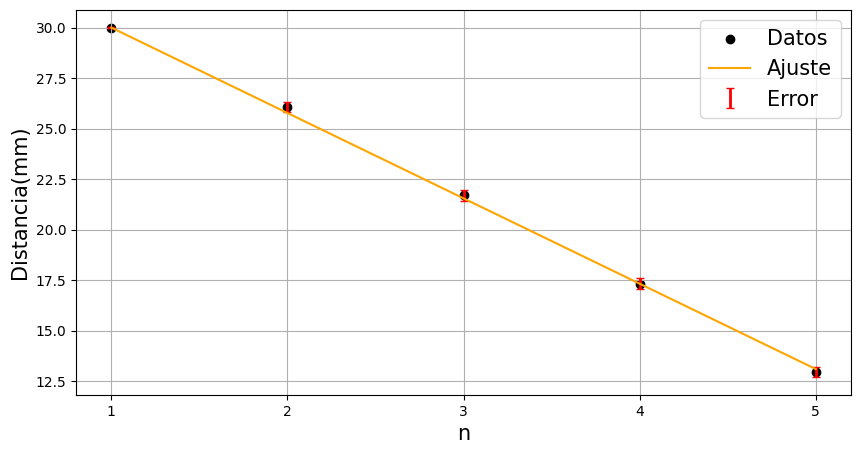

Pendiente: -4.23 
Ordenada: 34.23


In [93]:
nlambda = np.loadtxt('nlambda.csv', skiprows=1, delimiter=';')

n              = nlambda[:,0]
dist_landa     = nlambda[:,1]
err_dist_landa = nlambda[:,2]


# Ajuste
popt, _ = op.curve_fit(lin, n, dist_landa, sigma=err_dist_landa, absolute_sigma = True)
pend_nlambda = popt[0]
ord_nlambda  = popt[1]

dom_nlambda = np.linspace(1,5,10)
im_nlambda  = lin(dom_nlambda, pend_nlambda, ord_nlambda)

# Grafico
plt.figure(figsize=[10,5])

plt.scatter(n, dist_landa, c='black', marker='o', label='Datos')
plt.errorbar(n, dist_landa, yerr= err_dist_landa, linewidth= 0, elinewidth= 2, capsize = 3, c='red', label= 'Error')
plt.plot(dom_nlambda, im_nlambda, c='orange', label='Ajuste')

plt.xlabel('n',fontsize = 15)
plt.ylabel('Distancia(mm)',fontsize =15)
plt.xticks([1,2,3,4,5])
plt.grid()
plt.legend(fontsize='15')
plt.show()

print(f'Pendiente: {np.round(pend_nlambda, decimals=2)} \nOrdenada: {np.round(ord_nlambda, decimals=2)}')